In [1]:
import tensorflow as tf
import numpy as np

In [10]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

3


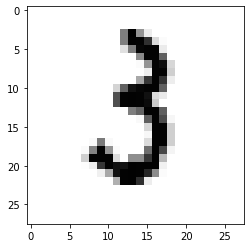

In [13]:
#Visualizing an image from the mnist dataset
import matplotlib.pyplot as plt
image_index = 1234 #any number between 0 to 60,000
print(y_train[image_index]) #the actual label value 
plt.imshow(x_train[image_index], cmap='Greys')

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [15]:
# Define a Neural Network Model
def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(64, input_dim=784, activation='sigmoid'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.8))
    model.add(Dense(10, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [16]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=200, verbose=0)

In [18]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.953, Test: 0.952


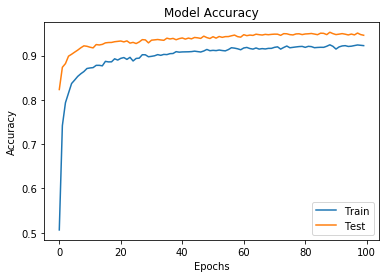

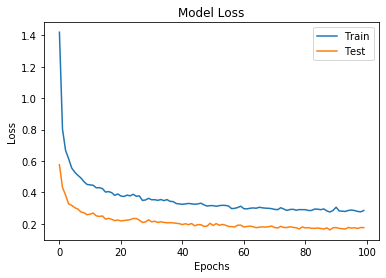

In [11]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

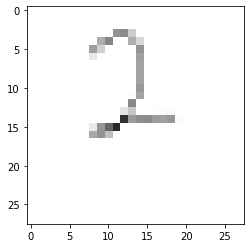

In [12]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img1 = mpimg.imread('./myImages/two.png')
gray1 = rgb2gray(img1)
img2 = mpimg.imread('./myImages/four.png')
gray2 = rgb2gray(img2)
img3 = mpimg.imread('./myImages/six.png')
gray3 = rgb2gray(img3)
img4 = mpimg.imread('./myImages/seven.png')
gray4 = rgb2gray(img4)
img5 = mpimg.imread('./myImages/nine.png')
gray5 = rgb2gray(img5)
plt.imshow(gray1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [13]:
myimgs=[]
myimgs.append(gray1)
myimgs.append(gray2)
myimgs.append(gray3)
myimgs.append(gray4)
myimgs.append(gray5)
myimgs=np.asarray(myimgs)
print(myimgs.shape)

(5, 28, 28)


In [14]:
myimgs=myimgs.reshape(myimgs.shape[0], myimgs.shape[1] * myimgs.shape[2])
y_myimgs=np.array([2,4,6,7,9])
y_myimgs=to_categorical(y_myimgs).astype(int)

print(myimgs.shape)
print(y_myimgs.shape)

(5, 784)
(5, 10)


In [15]:
y_myimgs

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [16]:
x_train=np.vstack((x_train,myimgs))
y_train=np.vstack((y_train,y_myimgs))
x_test=np.vstack((x_test,myimgs))
y_test=np.vstack((y_test,y_myimgs))

In [17]:
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=200, verbose=0)

In [18]:
# evaluate the model
_, train_acc1 = model.evaluate(x_train, y_train, verbose=0)
_, test_acc1 = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc1, test_acc1))

Train: 0.962, Test: 0.958


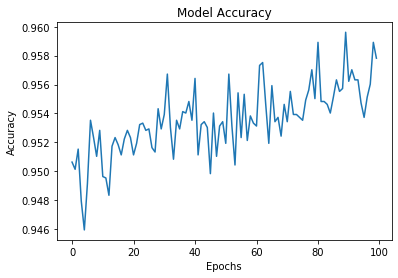

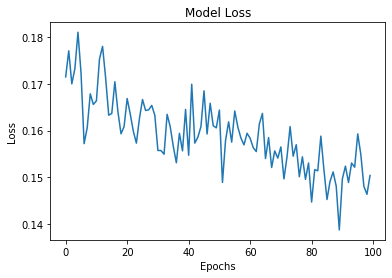

In [19]:
# Plot the model accuracy vs. number of Epochs
#plt.plot(history1.history1['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
#plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
#plt.plot(history.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
#plt.legend(['Train', 'Test'])
plt.show()